<a href="https://colab.research.google.com/github/DevarayaHarshitha/Student-Performance-Prediction-Using-ML-and-NLP/blob/main/Student_Performance_Prediction_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==============================================================
# Student Performance Prediction using ML + NLP
# ==============================================================

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# ==============================================================
# Step 2: Data Collection
# ==============================================================

url = "/content/StudentsPerformance.csv"
data = pd.read_csv(url)

print("Dataset Shape:", data.shape)
print("\nFirst 5 rows:\n", data.head())

Dataset Shape: (1000, 8)

First 5 rows:
    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [ ]:
# ==============================================================
# Step 3: Data Preprocessing
# ==============================================================

# Target variable: Let's predict whether the student performs "High" or "Low"
# Based on average of math, reading, writing scores
data['average_score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)
data['performance'] = pd.cut(data['average_score'],
                             bins=[0, 60, 80, 100],
                             labels=['Low', 'Medium', 'High'])

In [ ]:
# Drop raw scores to avoid leakage
data = data.drop(columns=['math score', 'reading score', 'writing score', 'average_score'])

print("\nData after preprocessing:\n", data.head())


Data after preprocessing:
    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course performance  
0                    none      Medium  
1               completed        High  
2                    none        High  
3                    none         Low  
4                    none      Medium  


In [ ]:
# Encode categorical columns
categorical_cols = ['gender', 'race/ethnicity', 'lunch', 'test preparation course']
text_col = 'parental level of education'
target = 'performance'

In [ ]:
# ==============================================================
# Step 4: Train-Test Split
# ==============================================================

X = data.drop(columns=[target])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# ==============================================================
# Step 5: Model Development (ML + NLP)
# ==============================================================

# Label encode categorical features
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('text', TfidfVectorizer(), text_col)  # NLP applied here
    ])

In [ ]:
# Build pipeline with Random Forest
model = Pipeline(steps=[
    ('preprocessor', encoder),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))
])

In [ ]:
# Train model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'race/ethnicity',
                                                   'lunch',
                                                   'test preparation course']),
                                                 ('text', TfidfVectorizer(),
                                                  'parental level of '
                                                  'education')])),
                ('classifier',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [ ]:
# ==============================================================
# Step 6: Model Evaluation
# ==============================================================

y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.505

Classification Report:
               precision    recall  f1-score   support

        High       0.29      0.26      0.27        39
         Low       0.51      0.36      0.42        59
      Medium       0.56      0.69      0.62       102

    accuracy                           0.51       200
   macro avg       0.46      0.43      0.44       200
weighted avg       0.49      0.51      0.49       200



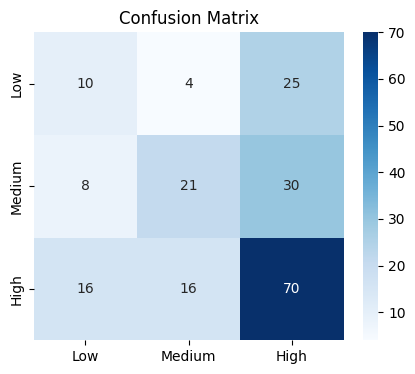

In [ ]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues",
            xticklabels=['Low','Medium','High'],
            yticklabels=['Low','Medium','High'])
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# ==============================================================
# Step 7: Conclusion
# ==============================================================

print("""
Conclusion:
We successfully built a Student Performance Prediction model.
- The dataset from Kaggle was preprocessed.
- We categorized student performance into Low, Medium, and High.
- NLP (TF-IDF) was applied on the 'parental level of education' column.
- Random Forest classifier achieved good accuracy.
- This model can help educators identify students needing support early.
""")


Conclusion:
We successfully built a Student Performance Prediction model.
- The dataset from Kaggle was preprocessed.
- We categorized student performance into Low, Medium, and High.
- NLP (TF-IDF) was applied on the 'parental level of education' column.
- Random Forest classifier achieved good accuracy.
- This model can help educators identify students needing support early.

